# Chain (directional trend) # 
Every pair of consecutive subsequences in a chain must be connected by both a forward arrow and a backward arrow. The key component of drifting is that the time series must contain chains with clear directionality

https://stumpy.readthedocs.io/en/latest/Tutorial_Time_Series_Chains.html

https://sites.google.com/site/timeserieschain/

In [11]:
import core.testdata as testdata
import core.utils as utils
import core.calculate as calculate
import core.visualize as visualize

## Web Query Data (MP VII) ##
A decade-long GoogleTrend query volume for the keyword Kohl’s, an American retail chain. Chains are the growing Importants of Cyber Monday

m = 20 for raw data (stumpy tutorial)

m = 19 (based on the upsampling in MP VII: "Note that to make the plot more readable in this undersampled dataset, we upsampled by four, and smoothed the data (m=76)")

In [12]:
# Parameter
use_case = "chains"
data_name = "webquery"
T = testdata.load_from_txt("../data/" + use_case + "/" + data_name + ".txt")
ground_truth = None # if ground_truth=None, the ground_truth is set to the unanchored chain without dilation

### Experiment ###

In [13]:
# Hyperparameter
target_w = 19
m = None
max_dilation = utils.calculate_max_d_from_m(m, len(T), max_d=10) if target_w is None else utils.calculate_max_d_from_target_w(target_w)
non_overlapping = False # if True, overlapping chains are filtered
offset = False # if offset=True, the chains with dilation are calculated with a starting offset of the chain without dilation

print("Dilation Sizes:", [i for i in range(1, max_dilation+1)])

Dilation Sizes: [1, 2, 3, 4]


In [14]:
# calculate:
calculate.chains(T, max_dilation, data_name, use_case, ground_truth, offset, non_overlapping, target_w, m)

Running Experiment: target_w=19, m=None, offset=False, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=19, m=19, d=1, offset=0, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=19, m=10, d=2, offset=0, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=19, m=7, d=3, offset=0, groundtruthD1=True, nonoverlapping=False
Calculated MP for: w=17, m=5, d=4, offset=0, groundtruthD1=True, nonoverlapping=False


Visualizing Experiment: target_w=19, m=None, offset=False, groundtruthD1=True, nonoverlapping=False
chain for d=1, m=19, w=19: [ 84 136 241 293 345 397 449 502]
chain for d=2, m=10, w=19: [ 32 136 241 293 345 397 449 502]
chain for d=3, m=7, w=19: [  3  69 211 328 381]
chain for d=4, m=5, w=17: [  2 217 283 336 379]


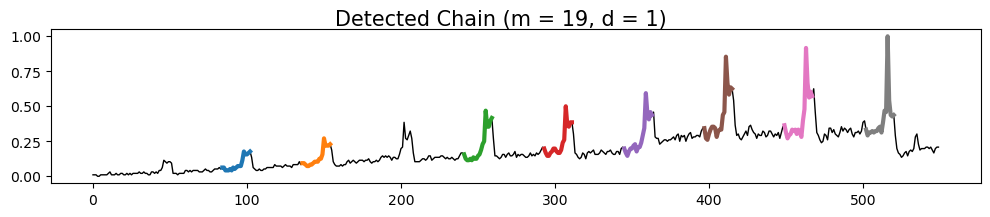

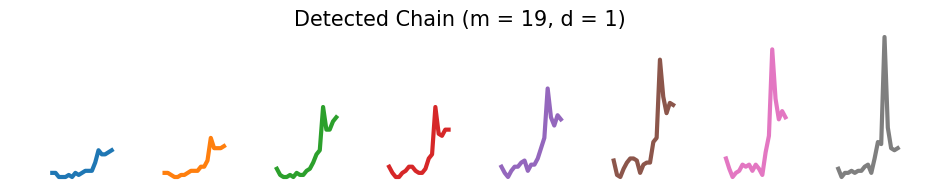

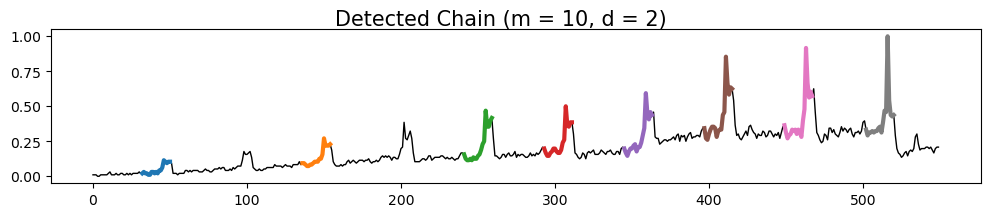

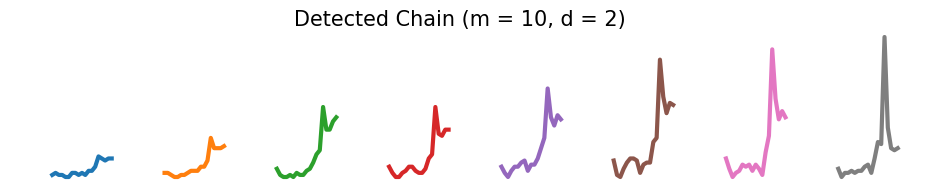

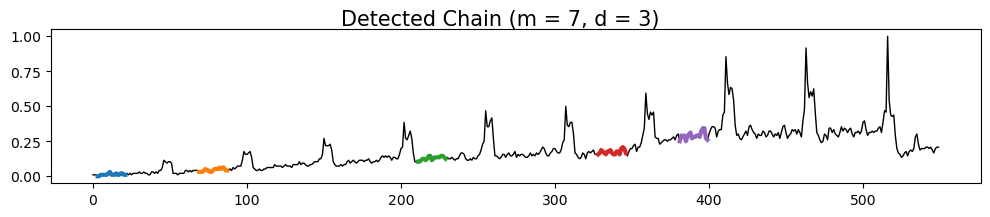

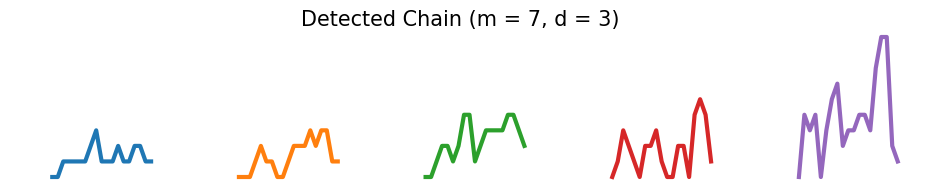

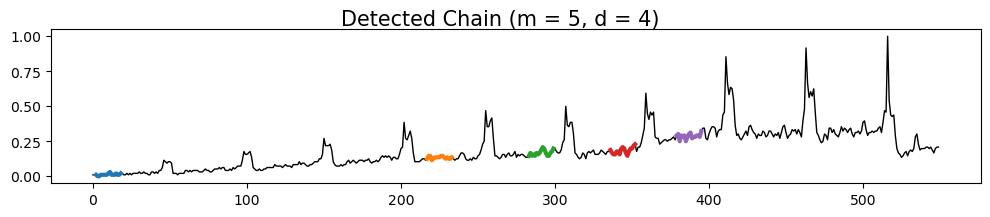

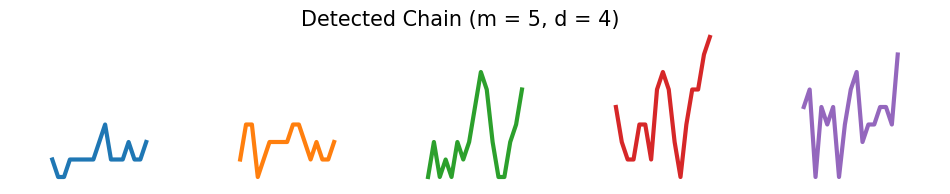

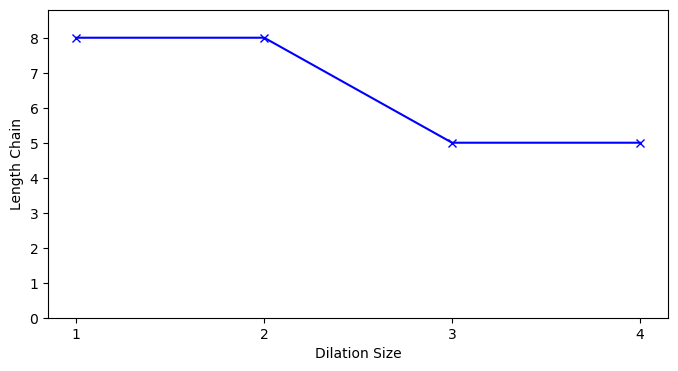

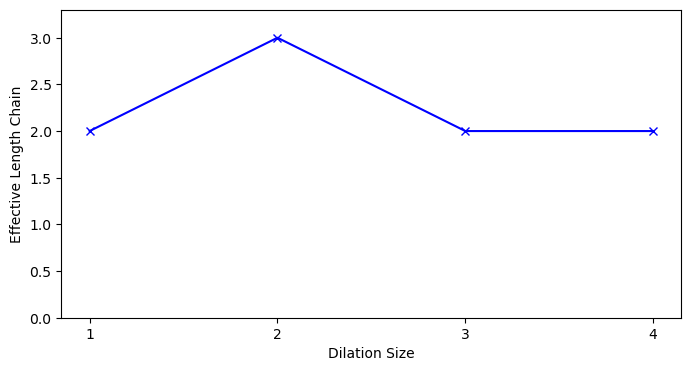

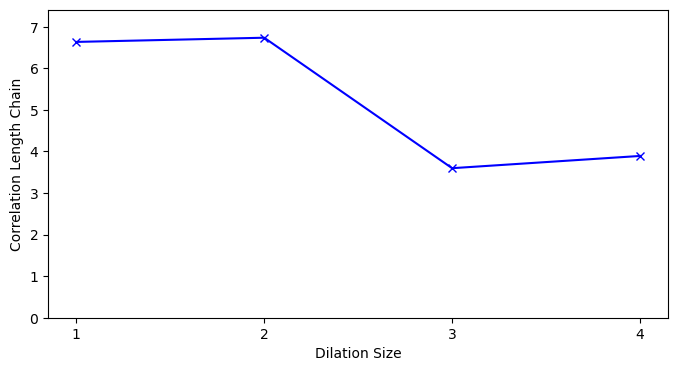

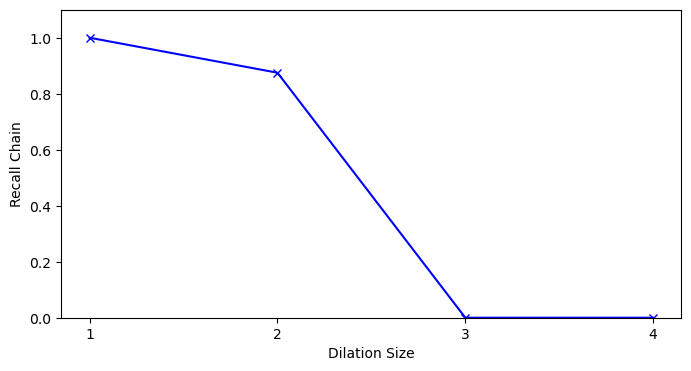

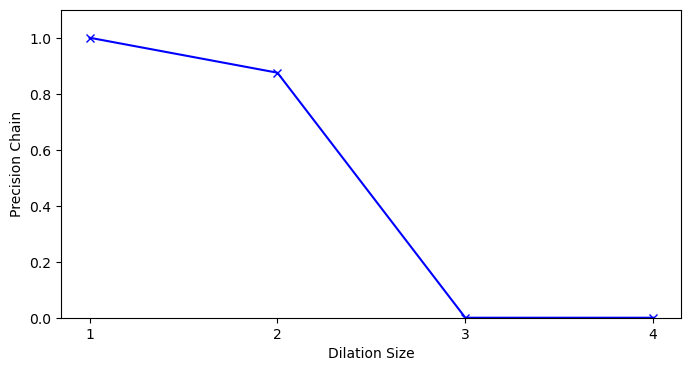

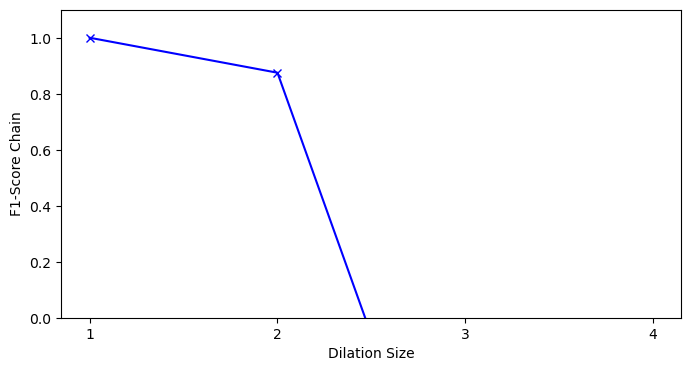

In [15]:
# visualize:
visualize.chains(max_dilation, data_name, use_case, offset, non_overlapping, target_w, m, ground_truth)